/Users/marcel_ruth/miniconda3/envs/ML_Conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


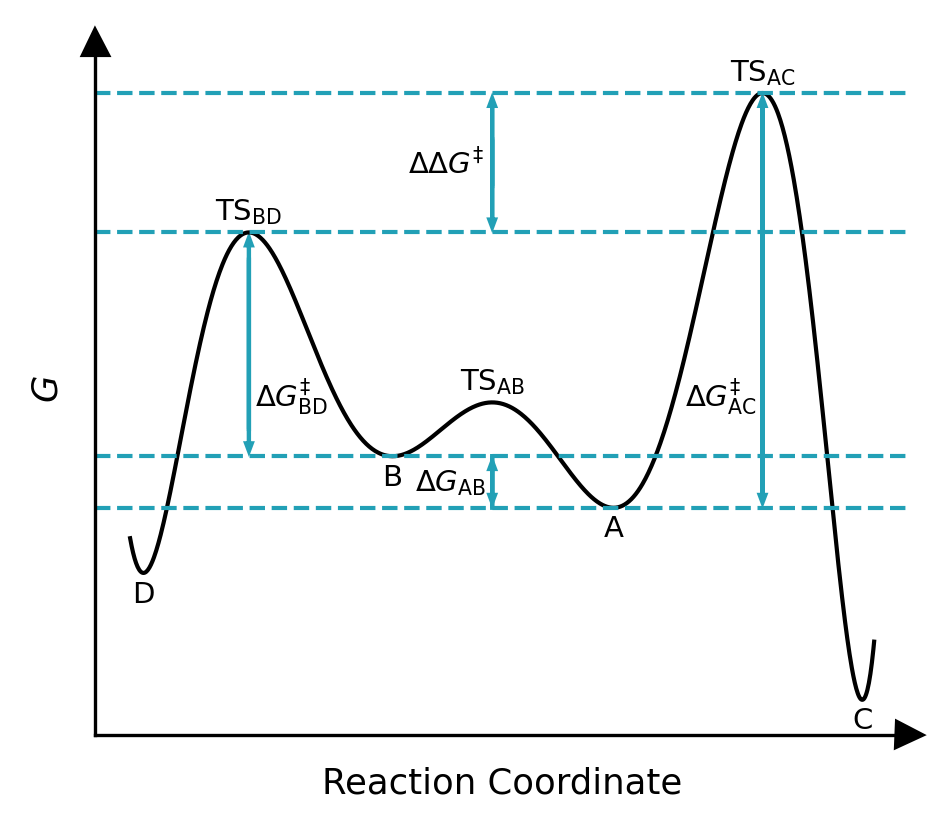

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fontsize = 8.5
x_offset = -0.4


gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
plt.style.use('default')
plt.rcParams['font.size'] =fontsize
arrow_fontsize = 7
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300)
# Define the points (alternating minima and maxima)
points = {
    'Max. 0': (-0.2, -0.8),
    'Min. 1': (0, -1),
    
    'Max. 1': (1, 2),
    
    'Min. 2': (2, 0),
    'Max. 2': (3, 0.5),
    
    'Min. 3': (4, -0.5),
    
    'Max. 3': (5, 3),
    
    'Min. 4': (6, -2),
    'Max. 5': (6.2, -1.8),
}

# Extract x and y values from the points
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]

# Fit a polynomial through the points
degree = 9


coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Compute the first and second derivatives of the polynomial
first_derivative = np.polyder(polynomial)
second_derivative = np.polyder(first_derivative)

# Find the roots of the first derivative
roots = np.roots(first_derivative)

# Filter out roots that are not within the range of x values
roots = roots[np.isreal(roots) & (roots >= min(x)) & (roots <= max(x))]

# Determine whether each root is a minimum or a maximum based on the second derivative
minima = []
maxima = []
for root in roots:
    second_derivative_value = second_derivative(root)
    if second_derivative_value > 0:
        minima.append((root, polynomial(root)))
    elif second_derivative_value < 0:
        maxima.append((root, polynomial(root)))

# Generate custom labels for minima and maxima
minima_labels = ['C', 'A', 'B', 'D']
maxima_labels = [r'TS$_\mathrm{AC}$', r'TS$_\mathrm{AB}$', r'TS$_\mathrm{BD}$']

# Generate x values for the fitted polynomial
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = polynomial(x_fit)

# Plot the fitted polynomial
ax.plot(x_fit, y_fit, 'black', linewidth=1)

# Plot minima and maxima
#ax.scatter(*zip(*minima), c=gensch_palette[2], label='Minima')
#ax.scatter(*zip(*maxima), c=gensch_palette[4], label='Maxima')

# Annotate minima with custom labels
for point, label in zip(minima, minima_labels):
    ax.annotate(label, point, ha='center', va='center', textcoords='offset points', xytext=(0, -5), fontsize=arrow_fontsize)

# Annotate maxima with custom labels
for point, label in zip(maxima, maxima_labels):
    ax.annotate(label, point, ha='center', va='center', textcoords='offset points', xytext=(0, 5), fontsize=arrow_fontsize)

# add horizontal lines minima
plt.axhline(y=minima[1][1], color=gensch_palette[1], linewidth=1, linestyle='--')
plt.axhline(y=minima[2][1], color=gensch_palette[1], linewidth=1, linestyle='--')

plt.arrow(maxima[1][0], minima[1][1], 0.0, 0.45, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)
plt.arrow(maxima[1][0], minima[1][1]+0.5, 0.0, -0.45, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)

plt.annotate(r'$\Delta G_\mathrm{AB}$', xy=(maxima[1][0] - 0.05, (minima[1][1] + minima[2][1])/2),
             xytext=(maxima[1][0] - 0.05, (minima[1][1] + minima[2][1])/2),
             ha='right', va='center', fontsize=arrow_fontsize)

# add horizontal lines ts
plt.axhline(y=maxima[0][1], color=gensch_palette[1], linewidth=1, linestyle='--')
plt.axhline(y=maxima[2][1], color=gensch_palette[1], linewidth=1, linestyle='--')

# second maxima is the lower one
plt.arrow(maxima[1][0], maxima[0][1] - 0.9, 0.0, 0.85, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)
plt.arrow(maxima[1][0], maxima[2][1] + 0.9, 0.0, -0.85, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)

plt.annotate(u'$\u0394\u0394 G^\u2021$', xy=(maxima[1][0] - 0.2, (maxima[0][1] + maxima[2][1])/2),
             xytext=(maxima[1][0] + x_offset, (maxima[0][1] + maxima[2][1])/2),
             ha='center', va='center', fontsize=arrow_fontsize)

# for TS 1
plt.arrow(maxima[2][0], maxima[2][1] - 1.9, 0.0, 1.85, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)
plt.arrow(maxima[2][0], minima[2][1] + 1.9, 0.0, -1.85, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)

plt.annotate(r'$\Delta G_\mathrm{BD}^‡$', xy=(maxima[2][0] + 0.05, (maxima[2][1] + minima[2][1])/2 - 0.5),
             xytext=(maxima[2][0] + 0.05, (maxima[2][1] + minima[2][1])/2 - 0.5),
             ha='left', va='center', fontsize=arrow_fontsize)

# for TS 2
plt.arrow(maxima[0][0], maxima[0][1] - 2.2, 0.0, 2.15, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)
plt.arrow(maxima[0][0], minima[1][1] + 2.2, 0.0, -2.15, shape='full', color=gensch_palette[1], lw=1, length_includes_head=True, head_width=0.05)

plt.annotate(r'$\Delta G_\mathrm{AC}^‡$', xy=(maxima[0][0] - 0.05, (maxima[2][1] + minima[2][1])/2 - 0.5),
             xytext=(maxima[0][0] - 0.05, (maxima[2][1] + minima[2][1])/2 - 0.5),
             ha='right', va='center', fontsize=arrow_fontsize)

ax.set_xlabel(u'Reaction Coordinate')
ax.set_ylabel('$G$')
#ax.set_title('Potential Energy Surface (PES) - Polynomial Fit with Alternating Minima and Maxima')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-2.7, 4])

# remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
plt.xlim([-0.5, 6.5])
ax.plot(1, -2.7, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(-0.5, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

#ax.legend()
plt.savefig('Fig1.png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()
